<center>

# **Đồ án cuối kì**

# **Môn Lập trình cho khoa học dữ liệu**

## **Chủ đề: Các vụ án mạng ở Mỹ từ năm 2016 đến năm 2020**

</center>

<center>

# **Mục lục**

</center>

# **Các thư viện sử dụng**

In [1382]:
# Libraries and Modules used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


---

# **Mô tả tập dữ liệu**

- Tập dữ liệu này được thu thập từ [**Murder Accountability Project**](https://www.murderdata.org/p/data-docs.html), do Thomas Hargrove sáng lập và công bố. Nhìn chung, tập dữ liệu mô tả về các vụ án giết người được xảy ra ở khắp mọi bang trên nước Mỹ từ năm 1976 đến năm 2020.

- Tập dữ liệu này là một tập dữ liệu mở được công bố dưới bản quyền [***Creative Commons CC-BY license***](https://creativecommons.org/licenses/by/4.0/), cho phép sử dụng không hạn chế dưới mọi hình thức, miễn là người dùng giữ nguyên tập dữ liệu gốc.

- Tập dữ liệu bao gồm những vụ án mạng được tổng hợp từ báo cáo của FBI và dữ liệu của Freedom of Information Act về các vụ án mạng không được báo cáo cho Justice Department.

- Do tập dữ liệu có kích cỡ quá lớn (khoảng 290MB) nên nhóm chúng em chỉ lọc lấy những vụ án từ năm 2016 đến năm 2020.

---

# **Tiền xử lý dữ liệu**

## Đọc dữ liệu vào Dataframe

In [1383]:
homi_df = pd.read_csv('homicide.csv')
homi_df

C:\Users\phuon\AppData\Local\Temp\ipykernel_952\3899079463.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  homi_df = pd.read_csv('homicide.csv')


,ID,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,StateName,...,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,MSA
0,201604266AL06201,"Tallapoosa, AL",AL06201,Alabama,Alexander City,Municipal police,MAP,Yes,2016,NaN,...,White,Unknown or not reported,"Firearm, type not stated",Relationship not determined,Circumstances undetermined,NaN,0,0,92517.0,Rural Alabama
1,201604265AL05003,"Marshall, AL",AL05003,Alabama,Arab,Municipal police,MAP,Yes,2016,NaN,...,White,Unknown or not reported,"Handgun - pistol, revolver, etc",Relationship not determined,Other negligent handling of gun,NaN,0,0,92517.0,Rural Alabama
2,201604529AL04301,"Lee, AL",AL04301,Alabama,Auburn,Municipal police,MAP,Yes,2016,NaN,...,Black,Unknown or not reported,"Firearm, type not stated",Other family,Other - not specified,NaN,0,0,92517.0,"Auburn-Opelika, AL"
3,201604593AL04301,"Lee, AL",AL04301,Alabama,Auburn,Municipal police,MAP,Yes,2016,NaN,...,Black,Unknown or not reported,"Firearm, type not stated",Relationship not determined,Other - not specified,NaN,0,0,92517.0,"Auburn-Opelika, AL"
4,201604594AL04301,"Lee, AL",AL04301,Alabama,Auburn,Municipal police,MAP,Yes,2016,NaN,...,Black,Unknown or not reported,"Firearm, type not stated",Relationship not determined,Other - not specified,NaN,0,0,92517.0,"Auburn-Opelika, AL"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92086,202003001WY01700,"Sheridan, WY",WY01700,Wyoming,Sheridan County,Sheriff,FBI,Yes,2020,WYOMIN,...,American Indian or Alaskan Native,Not of Hispanic origin,"Handgun - pistol, revolver, etc",Sister,Brawl due to influence of alcohol,NaN,2,0,83121.0,Rural Wyoming
92087,202003001WY01700,"Sheridan, WY",WY01700,Wyoming,Sheridan County,Sheriff,FBI,Yes,2020,WYOMIN,...,American Indian or Alaskan Native,Not of Hispanic origin,"Handgun - pistol, revolver, etc",Sister,Brawl due to influence of alcohol,NaN,2,0,83121.0,Rural Wyoming
92088,202005001WY01101,"Laramie, WY",WY01101,Wyoming,Cheyenne,Municipal police,FBI,Yes,2020,WYOMIN,...,White,Not of Hispanic origin,"Firearm, type not stated",Other - known to victim,Other arguments,NaN,0,0,83121.0,"Cheyenne, WY"
92089,202005001WY01100,"Laramie, WY",WY01100,Wyoming,Laramie County,Sheriff,FBI,Yes,2020,WYOMIN,...,White,Hispanic origin,"Handgun - pistol, revolver, etc",Boyfriend,Other arguments,NaN,0,0,83121.0,"Cheyenne, WY"


## Số dòng và số cột của tập dữ liệu

In [1384]:
row = homi_df.shape[0]
col = homi_df.shape[1]
print('Số dòng:', row)
print('Số cột', col)

Số dòng: 92091
Số cột 31


## Ý nghĩa của mỗi dòng

Mỗi dòng là thông tin của 1 vụ án bao gồm thời gian, địa điểm và thông tin liên quan đến nạn nhân và hung thủ.

## Kiểm tra các dòng bị trùng lắp

- Thực hiện xóa các dòng bị trùng lắp do trong đó có nhiều nạn nhân liên quan tới cùng 1 vụ án.

In [1385]:
# homi_df = homi_df['ID'].ddrop_duplicates() 

In [1386]:
# duplicated = homi_df.duplicated()
# print('Số dòng bị trùng:', len(duplicated[duplicated==True]))

## Ý nghĩa của mỗi cột

In [1387]:
des_df = pd.read_csv('description.csv')
pd.set_option('display.max_colwidth', None)
des_df

,Đặc trưng,Mô tả
0,ID,ID của vụ án
1,CNTYFIPS,Mã Federal Information Processing Standards (FIPS) cho bang và hạt của cơ quan hành pháp
2,Ori,Mã của cơ quan hành pháp
3,State,Tên bang
4,Agency,Tên cơ quan hành pháp
5,Agentype,Phân loại cơ quan hành pháp
6,Source,Nguồn thông tin
7,Solved,Vụ án có được phá tại thời điểm thực hiện báo cáo hay không
8,Year,Năm xảy ra vụ án
9,StateName,Tên bang


## Kiểm tra kiểu dữ liệu của các cột và điều chỉnh cho phù hợp

- Kiểm tra kiểu dữ liệu của từng cột

In [1388]:
homi_df.dtypes

ID               object
CNTYFIPS         object
Ori              object
State            object
Agency           object
Agentype         object
Source           object
Solved           object
Year              int64
StateName        object
Month            object
Incident          int64
ActionType       object
Homicide         object
Situation        object
VicAge            int64
VicSex           object
VicRace          object
VicEthnic        object
OffAge            int64
OffSex           object
OffRace          object
OffEthnic        object
Weapon           object
Relationship     object
Circumstance     object
Subcircum        object
VicCount          int64
OffCount          int64
FileDate        float64
MSA              object
dtype: object

---

In [1389]:
homi_df['StateName'].unique()

array([nan, 'FLA', 'ALABAM', 'ALASKA', 'ARIZON', 'ARKANS', 'CALIFO',
       'COLORA', 'CONNEC', 'DELAWA', 'FEDERA', 'DISTRI', 'FLORID',
       'GEORGI', 'HAWAII', 'IDAHO', 'ILLINO', 'INDIAN', 'IOWA', 'KANSAS',
       'KENTUC', 'LOUISI', 'MAINE', 'MARYLA', 'MASSAC', 'MICHIG',
       'MINNES', 'MISSIS', 'MISSOU', 'MONTAN', 'NEBRAS', 'NEVADA',
       'NEW HA', 'NEW JE', 'NEW ME', 'NEW YO', 'NORTH', 'OHIO', 'OKLAHO',
       'OREGON', 'PENNSY', 'RHODE', 'SOUTH', 'TENNES', 'TEXAS', 'UTAH',
       'VERMON', 'VIRGIN', 'WASHIN', 'WEST V', 'WISCON', 'WYOMIN'],
      dtype=object)

In [1390]:
dtype = homi_df['StateName'].apply(lambda i: type(i))
dtype.unique()

array([<class 'float'>, <class 'str'>], dtype=object)

In [1391]:
len(homi_df[homi_df['StateName'].isna()])

69623

- Ta thấy cột `StateName` chứa dữ liệu hỗn hợp với dữ liệu `nan` là float và tên các bang là string. Tuy nhiên có đến 69378 dòng là nan. Hơn nữa, tên bang cũng đã được lưu trong cột dữ liệu `State`. Cho nên, ta có thể xóa cột dữ liệu này (ở bước ***Xử lý các dòng bị thiếu dữ liệu***).

---

In [1392]:
np.sort(homi_df['VicAge'].unique())

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 999], dtype=int64)

- Ta thấy có những dòng mà tuổi của nạn nhân là 999. Ở đây, do kiểu dữ liệu của cột VicAge là số nguyên cho nên tác giả dùng 1 con số đặc biệt để biểu thị cho giá trị không biết của tuổi nạn nhân, cụ thể là 999. Việc này có thể xem bình thường cho nên không cần thay đổi gì cả.

---

In [1393]:
np.sort(homi_df['OffAge'].unique())

array([  0,   1,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 999], dtype=int64)

- Đối với cột OffAge thì lý giải cũng tương tự như đối với cột VicAge.

---

In [1394]:
homi_df['Subcircum'].unique()

array([nan, 'Felon killed in commission of a crime',
       'Felon attacked police officer', 'Felon attacked a civilian',
       'Not enough information to determine',
       'Felon attacked fellow police officer', 'Felon resisted arrest',
       'Felon attempted flight from a crime'], dtype=object)

In [1395]:
dtype = homi_df['Subcircum'].apply(lambda i: type(i))
dtype.unique()

array([<class 'float'>, <class 'str'>], dtype=object)

- Ta thấy cột `Subcircum` cũng chứa dữ liệu hỗn hợp như cột StateName. Tuy nhiên, các dòng chứa dữ liệu khác `nan` có vai trò làm rõ cho hoàn cảnh gây án. Do đó, chúng ta sẽ không bỏ cột này đi, và thay các giá trị `nan` bằng `Not specified`.

In [1396]:
len(homi_df[homi_df['Subcircum'].isna()])

87677

In [1397]:
homi_df['Subcircum'].replace(np.nan, 'Not specified', inplace=True)

In [1398]:
len(homi_df[homi_df['Subcircum'] == 'Not specified'])

87677

- Kiểm tra lại kiểu dữ liệu

In [1399]:
new_dtype = homi_df['Subcircum'].apply(lambda i: type(i))
new_dtype.unique()

array([<class 'str'>], dtype=object)

---

In [1400]:
homi_df['FileDate'].unique()

array([ 92517.,  11818.,  11317., 110716.,  33017.,  22717.,  51917.,
        71216.,  32117.,  82316.,  82416.,  91616., 112216.,  42617.,
        20317.,  31717.,  42117.,  81916., 101116.,  33117., 121417.,
        30217., 120516.,  41817.,  90717.,  71416.,  71816., 122316.,
       101316., 122917.,  82516.,  72116.,  32017.,  21517.,  71316.,
        92016., 122216.,  12317., 101216., 111716.,  41217.,  40717.,
        41117.,  12017.,  30817., 113016.,  91416.,  12717.,  22117.,
        81017.,  30117.,  72216., 111616.,  71916.,  81116., 121916.,
        51817.,  11117.,  80417.,  42717.,  50817.,  21216.,  31017.,
        40417.,  81417.,  20217.,  51117.,  51517.,  53017.,  42017.,
        30317.,  41317., 100716.,  32717.,  90616.,  22817.,  10317.,
       120616.,  72616.,  51217.,  51017.,  50417., 100616.,  42817.,
       120216.,  40517.,  82817.,  11217., 110816.,  50117.,  82317.,
       121917.,  91117., 110117.,  80416., 100316.,  80816.,  92116.,
        11717.,  216

In [1401]:
len(homi_df[homi_df['FileDate'].isna()])

2510

- Ở đây, dữ liệu (khác `nan`) của mỗi dòng là dãy số tượng trưng cho ngày, tháng, năm của thời điểm thực hiện báo cáo về vụ án. Những dòng này đúng ra phải nên được chuyển về dang datetime. Tuy nhiên do tính liên quan đến vấn đề không được chặt chẽ lắm (thời điểm thực hiện báo cáo có thể không trùng với thời điểm gây án, và có thể chỉ là thời điểm được ước tính), nên ta có thể bỏ cột này đi (ở bước ***Xử lý các dòng bị thiếu dữ liệu***).

---

- Kiểm tra kiểu dữ liệu của tất cả các cột 1 lần nữa

In [1402]:
homi_df.dtypes

ID               object
CNTYFIPS         object
Ori              object
State            object
Agency           object
Agentype         object
Source           object
Solved           object
Year              int64
StateName        object
Month            object
Incident          int64
ActionType       object
Homicide         object
Situation        object
VicAge            int64
VicSex           object
VicRace          object
VicEthnic        object
OffAge            int64
OffSex           object
OffRace          object
OffEthnic        object
Weapon           object
Relationship     object
Circumstance     object
Subcircum        object
VicCount          int64
OffCount          int64
FileDate        float64
MSA              object
dtype: object

- Kiểm tra lại toàn bộ tập dữ liệu

In [1403]:
homi_df

,ID,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,StateName,...,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,MSA
0,201604266AL06201,"Tallapoosa, AL",AL06201,Alabama,Alexander City,Municipal police,MAP,Yes,2016,NaN,...,White,Unknown or not reported,"Firearm, type not stated",Relationship not determined,Circumstances undetermined,Not specified,0,0,92517.0,Rural Alabama
1,201604265AL05003,"Marshall, AL",AL05003,Alabama,Arab,Municipal police,MAP,Yes,2016,NaN,...,White,Unknown or not reported,"Handgun - pistol, revolver, etc",Relationship not determined,Other negligent handling of gun,Not specified,0,0,92517.0,Rural Alabama
2,201604529AL04301,"Lee, AL",AL04301,Alabama,Auburn,Municipal police,MAP,Yes,2016,NaN,...,Black,Unknown or not reported,"Firearm, type not stated",Other family,Other - not specified,Not specified,0,0,92517.0,"Auburn-Opelika, AL"
3,201604593AL04301,"Lee, AL",AL04301,Alabama,Auburn,Municipal police,MAP,Yes,2016,NaN,...,Black,Unknown or not reported,"Firearm, type not stated",Relationship not determined,Other - not specified,Not specified,0,0,92517.0,"Auburn-Opelika, AL"
4,201604594AL04301,"Lee, AL",AL04301,Alabama,Auburn,Municipal police,MAP,Yes,2016,NaN,...,Black,Unknown or not reported,"Firearm, type not stated",Relationship not determined,Other - not specified,Not specified,0,0,92517.0,"Auburn-Opelika, AL"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92086,202003001WY01700,"Sheridan, WY",WY01700,Wyoming,Sheridan County,Sheriff,FBI,Yes,2020,WYOMIN,...,American Indian or Alaskan Native,Not of Hispanic origin,"Handgun - pistol, revolver, etc",Sister,Brawl due to influence of alcohol,Not specified,2,0,83121.0,Rural Wyoming
92087,202003001WY01700,"Sheridan, WY",WY01700,Wyoming,Sheridan County,Sheriff,FBI,Yes,2020,WYOMIN,...,American Indian or Alaskan Native,Not of Hispanic origin,"Handgun - pistol, revolver, etc",Sister,Brawl due to influence of alcohol,Not specified,2,0,83121.0,Rural Wyoming
92088,202005001WY01101,"Laramie, WY",WY01101,Wyoming,Cheyenne,Municipal police,FBI,Yes,2020,WYOMIN,...,White,Not of Hispanic origin,"Firearm, type not stated",Other - known to victim,Other arguments,Not specified,0,0,83121.0,"Cheyenne, WY"
92089,202005001WY01100,"Laramie, WY",WY01100,Wyoming,Laramie County,Sheriff,FBI,Yes,2020,WYOMIN,...,White,Hispanic origin,"Handgun - pistol, revolver, etc",Boyfriend,Other arguments,Not specified,0,0,83121.0,"Cheyenne, WY"


---

In [1404]:
homi_df['FileDate'].nunique()

389

## Tìm sự phân phối của các cột dữ liệu kiểu số

In [1405]:
col_num = ['Year','Incident','VicAge','OffAge','VicCount','OffCount']

num_df = homi_df[col_num]

mising_percentage = (num_df.isna().sum() / row) * 100       # tỉ lệ giá trị bị thiếu
min_values = num_df.min()                                   # các giá trị nhỏ nhất
max_values = num_df.max()                                   # các giá trị lớn nhất

num_cols_distribution = pd.DataFrame(data = np.array((mising_percentage, min_values, max_values)),
                                                      columns = num_df.columns,
                                                      index = ['mising percentage', 'min', 'max'])
num_cols_distribution

,Year,Incident,VicAge,OffAge,VicCount,OffCount
mising percentage,0.0,0.0,0.0,0.0,0.0,0.0
min,2016.0,0.0,0.0,0.0,0.0,0.0
max,2020.0,999.0,999.0,999.0,21.0,40.0


## Tìm sự phân phối của các cột dữ liệu kiểu phân loại

In [1406]:
cat_df = homi_df.copy().drop(columns=col_num)

mising_percentage = (cat_df.isna().sum() / row) * 100           # tỉ lệ giá trị bị thiếu
num_diff_vals = cat_df.apply(lambda col: col.nunique())         # số giá trị khác nhau
diff_vals = cat_df.apply(lambda col: col.dropna().unique())     # các giá trị khác nhau

cat_cols_distribution = pd.DataFrame(data = np.array((mising_percentage, num_diff_vals, diff_vals)),
                                     columns = cat_df.columns,
                                     index = ['mising percentage', 'num_diff_vals', 'diff_vals'])
cat_cols_distribution

,ID,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,StateName,Month,...,VicEthnic,OffSex,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,FileDate,MSA
mising percentage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.602393,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.725565,0.0
num_diff_vals,86890,2384,7048,52,5589,8,2,2,51,12,...,3,3,6,3,17,29,32,8,389,408
diff_vals,"[201604266AL06201, 201604265AL05003, 201604529AL04301, 201604593AL04301, 201604594AL04301, 201604595AL04301, 201604761AL00500, 201604653AL00101, 201604106AL00102, 201604132AL00102, 201604145AL00102, 201604325AL00102, 201604370AL00102, 201604616AL00102, 201604747AL00102, 201604759AL00102, 201604918AL00102, 201604601AL06103, 201604810AL00204, 201604269AL01902, 201604924AL00104, 201604563AL03004, 201604148AL04101, 201604058AL04701, 201604578AL04701, 201604518AL00113, 201604309AL00100, 201604362AL00100, 201604143AL06104, 201604623AL00201, 201604874AL00201, 201604916AL00301, 201604943AL00301, 201604981AL00301, 201604992AL00301, 201604163AL04302, 201604784AL05209, 201604821AL05209, 201604118AL00202, 201604582AL02701, 201604584AL02701, 201604003AL06000, 201604237AL06000, 201604016AL06301, 201604510AL04902, 201604598AL04902, 201608435AL00312, 201608332AL00101, 201608067AL00102, 201608070AL00102, 201608130AL00102, 201608257AL00102, 201608373AL00102, 201608778AL00102, 201608240AL05201, 201608241AL05201, 201608243AL05201, 201608449AL03102, 201608001AL00112, 201608635AL04701, 201608119AL00100, 201608153AL04300, 201608296AL04300, 201608527AL04300, 201608338AL00107, 201608596AL05701, 201608030AL00202, 201608740AL06100, 201608835AL06301, 201608901AL06301, 201608089AL06300, 201608173AL04601, 201612608AL00102, 201612609AL00102, 201612659AL00102, 201612673AL00102, 201612766AL00102, 201612772AL00102, 201612777AL00102, 201612112AL02700, 201612242AL05201, 201612447AL02900, 201612261AL03400, 201612081AL01001, 201612382AL00110, 201612634AL00119, 201612207AL04701, 201612216AL04701, 201612254AL00100, 201612727AL00120, 201612728AL00120, 201612166AL04500, 201612223AL04702, 201612081AL00201, 201612859AL00201, 201612860AL00201, 201612879AL00201, 201612825AL00200, 201612826AL00200, 201612827AL00200, ...]","[Tallapoosa, AL, Marshall, AL, Lee, AL, Baldwin, AL, Jefferson, AL, Talladega, AL, Mobile, AL, Coffee, AL, Escambia, AL, Lauderdale, AL, Madison, AL, Montgomery, AL, Morgan, AL, Dallas, AL, Sumter, AL, Tuscaloosa, AL, Marion, AL, Etowah, AL, Russell, AL, Macon, AL, Elmore, AL, Geneva, AL, Butler, AL, Lowndes, AL, Shelby, AL, Washington, AL, De Kalb, AL, Covington, AL, Calhoun, AL, Bullock, AL, Walker, AL, Cherokee, AL, Dale, AL, Houston, AL, Pike, AL, Barbour, AL, St. Clair, AL, Pickens, AL, Colbert, AL, Marengo, AL, Monroe, AL, Limestone, AL, Clarke, AL, Cullman, AL, Franklin, AL, Chambers, AL, Autauga, AL, Wilcox, AL, Crenshaw, AL, Blount, AL, Perry, AL, Anchorage, AK, Valdez-Cordova, AK, Fairbanks North Star, AK, Kenai Peninsula, AK, Kodiak Island, AK, Northwest Arctic, AK, Pinal, AZ, Maricopa, AZ, La Paz, AZ, Mohave, AZ, Navajo, AZ, Pima, AZ, Yuma, AZ, Apache, AZ, Cochise, AZ, Yavapai, AZ, Santa Cruz, AZ, Coconino, AZ, Gila, AZ, Craighead, AR, St. Francis, AR, Sebastian, AR, Pulaski, AR, Crittenden, AR, Poinsett, AR, Jackson, AR, Faulkner, AR, Logan, AR, White, AR, Saline, AR, Mississippi, AR, Ouachita, AR, Columbia, AR, Washington, AR, Hempstead, AR, Newton, AR, Carroll, AR, Sevier, AR, Boone, AR, Hot Spring, AR, Van Buren, AR, Arkansas, AR, Union, AR, Miller, AR, Drew, AR, Jefferson, AR, Bradley, AR, Cleburne, AR, Ashley, AR, ...]","[AL06201, AL05003, AL04301, AL00500, AL00101, AL00102, AL06103, AL00204, AL01902, AL00104, AL03004, AL04101, AL04701, AL00113, AL00100, AL06104, AL00201, AL00301, AL04302, AL05209, AL00202, AL02701, AL06000, AL06301, AL04902, AL00312, AL05201, AL03102, AL00112, AL04300, AL00107, AL05701, AL06100, AL06300, AL04601, AL02700, AL02900, AL03400, AL01001, AL00110, AL00119, AL00120, AL04500, AL04702, AL00200, AL05900, AL06500, AL01000, AL02800, AL02303, AL00111, AL

## Xử lý các dòng bị thiếu dữ liệu

- Xóa các cột `StateName` và `FileDate` như đã đề cập ở bước ***Kiểm tra dữ liệu của các cột và điều chỉnh cho phù hợp***.

In [1407]:
homi_df = homi_df.drop(columns = ['StateName', 'FileDate'], axis = 1)

In [1408]:
homi_df

,ID,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,Month,...,OffSex,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,MSA
0,201604266AL06201,"Tallapoosa, AL",AL06201,Alabama,Alexander City,Municipal police,MAP,Yes,2016,April,...,Male,White,Unknown or not reported,"Firearm, type not stated",Relationship not determined,Circumstances undetermined,Not specified,0,0,Rural Alabama
1,201604265AL05003,"Marshall, AL",AL05003,Alabama,Arab,Municipal police,MAP,Yes,2016,April,...,Male,White,Unknown or not reported,"Handgun - pistol, revolver, etc",Relationship not determined,Other negligent handling of gun,Not specified,0,0,Rural Alabama
2,201604529AL04301,"Lee, AL",AL04301,Alabama,Auburn,Municipal police,MAP,Yes,2016,April,...,Male,Black,Unknown or not reported,"Firearm, type not stated",Other family,Other - not specified,Not specified,0,0,"Auburn-Opelika, AL"
3,201604593AL04301,"Lee, AL",AL04301,Alabama,Auburn,Municipal police,MAP,Yes,2016,April,...,Male,Black,Unknown or not reported,"Firearm, type not stated",Relationship not determined,Other - not specified,Not specified,0,0,"Auburn-Opelika, AL"
4,201604594AL04301,"Lee, AL",AL04301,Alabama,Auburn,Municipal police,MAP,Yes,2016,April,...,Male,Black,Unknown or not reported,"Firearm, type not stated",Relationship not determined,Other - not specified,Not specified,0,0,"Auburn-Opelika, AL"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92086,202003001WY01700,"Sheridan, WY",WY01700,Wyoming,Sheridan County,Sheriff,FBI,Yes,2020,March,...,Male,American Indian or Alaskan Native,Not of Hispanic origin,"Handgun - pistol, revolver, etc",Sister,Brawl due to influence of alcohol,Not specified,2,0,Rural Wyoming
92087,202003001WY01700,"Sheridan, WY",WY01700,Wyoming,Sheridan County,Sheriff,FBI,Yes,2020,March,...,Male,American Indian or Alaskan Native,Not of Hispanic origin,"Handgun - pistol, revolver, etc",Sister,Brawl due to influence of alcohol,Not specified,2,0,Rural Wyoming
92088,202005001WY01101,"Laramie, WY",WY01101,Wyoming,Cheyenne,Municipal police,FBI,Yes,2020,May,...,Male,White,Not of Hispanic origin,"Firearm, type not stated",Other - known to victim,Other arguments,Not specified,0,0,"Cheyenne, WY"
92089,202005001WY01100,"Laramie, WY",WY01100,Wyoming,Laramie County,Sheriff,FBI,Yes,2020,May,...,Female,White,Hispanic origin,"Handgun - pistol, revolver, etc",Boyfriend,Other arguments,Not specified,0,0,"Cheyenne, WY"


---

# **Phân tích dữ liệu**

## **Câu hỏi số 1**

### Tiền xử lý

### Phân tích

### Trực quan hóa

### Trả lời câu hỏi

- (Nhập câu trả lời và giải thích)

---

## **Câu hỏi số 2**

- (Nhập câu hỏi)
- (Lợi ích của việc tìm câu trả lời cho câu hỏi này)

### Tiền xử lý

### Phân tích

### Trực quan hóa

### Trả lời câu hỏi

- (Nhập câu trả lời và giải thích)

---

## **Câu hỏi số 3**

### **3 bang nào có các vụ án có thủ phạm là người trong gia đình nhiều nhất.**

- Từ việc trả lời câu hỏi trên, ta có thể đưa ra những phương pháp để bảo vệ khỏi những chuyện đáng tiếc không nên xảy ra, nâng cao ý thức cũng như trách nhiệm của mỗi người trong gia đình.

### Tiền xử lý

- Để có thể lấy được những vụ án có thủ phạm là người trong gia đình thì ta sẽ lấy những cột có liên quan như: 
    - ID: Để có thể chọn lọc những vụ án.
    - State: Để tìm ra những ban có liên quan.
    - Year: Để xem chiều hướng của các vụ án đó.
    - Homicide: Để chọn được những vụ án có liên quan đến câu hỏi.
    - Relationship: Để tìm ra mối quan hệ ruột thịt giữa nạn nhân và hung thủ.   


In [1409]:
df = homi_df[['ID', 'State', 'Year', 'Homicide', 'Relationship']]
df

,ID,State,Year,Homicide,Relationship
0,201604266AL06201,Alabama,2016,Murder and non-negligent manslaughter,Relationship not determined
1,201604265AL05003,Alabama,2016,Murder and non-negligent manslaughter,Relationship not determined
2,201604529AL04301,Alabama,2016,Murder and non-negligent manslaughter,Other family
3,201604593AL04301,Alabama,2016,Murder and non-negligent manslaughter,Relationship not determined
4,201604594AL04301,Alabama,2016,Murder and non-negligent manslaughter,Relationship not determined
...,...,...,...,...,...
92086,202003001WY01700,Wyoming,2020,Murder and non-negligent manslaughter,Sister
92087,202003001WY01700,Wyoming,2020,Murder and non-negligent manslaughter,Sister
92088,202005001WY01101,Wyoming,2020,Murder and non-negligent manslaughter,Other - known to victim
92089,202005001WY01100,Wyoming,2020,Murder and non-negligent manslaughter,Boyfriend


- Trước tiên ta xóa những dòng trùng lắp ID của các vụ báo cáo vì: Trong data của chúng ta, báo cáo sẽ bao gồm thông tin của nạn nhân và hung thủ. Mà có thể bị trùng ID do là nạn nhân khác trong cùng một vụ án.
    

In [1410]:
df = df.drop_duplicates(subset='ID', keep="first", inplace= False).reset_index()
df = df.iloc[:,1:]
df

,ID,State,Year,Homicide,Relationship
0,201604266AL06201,Alabama,2016,Murder and non-negligent manslaughter,Relationship not determined
1,201604265AL05003,Alabama,2016,Murder and non-negligent manslaughter,Relationship not determined
2,201604529AL04301,Alabama,2016,Murder and non-negligent manslaughter,Other family
3,201604593AL04301,Alabama,2016,Murder and non-negligent manslaughter,Relationship not determined
4,201604594AL04301,Alabama,2016,Murder and non-negligent manslaughter,Relationship not determined
...,...,...,...,...,...
86885,202003001WY00702,Wyoming,2020,Murder and non-negligent manslaughter,Friend
86886,202003001WY01700,Wyoming,2020,Murder and non-negligent manslaughter,Sister
86887,202005001WY01101,Wyoming,2020,Murder and non-negligent manslaughter,Other - known to victim
86888,202005001WY01100,Wyoming,2020,Murder and non-negligent manslaughter,Boyfriend


### Phân tích

- Bây giờ ta sẽ xem xét mối quan hệ của từng vụ án

In [1411]:
relationship = df['Relationship'].unique()
relationship

array(['Relationship not determined', 'Other family', 'Boyfriend',
       'Girlfriend', 'Acquaintance', 'Husband', 'Other - known to victim',
       'Stranger', 'Father', 'Mother', 'Friend', 'Neighbor', 'Son',
       'Wife', 'Sister', 'In-law', 'Stepfather', 'Stepson',
       'Homosexual relationship', 'Daughter', 'Brother', 'Ex-wife',
       'Stepmother', 'Common-law wife', 'Employer', 'Common-law husband',
       'Stepdaughter', 'Ex-husband', 'Employee'], dtype=object)

- Từ đó, ta có thể chọn lọc được những vụ án mà hung thủ có mối quan hệ trong gia đình với nạn nhân. Ví dụ như là: Husband, Wife, Sister, In-law, Stepfather, Stepson, Daughter, Brother, Stepmother, Common-law wife, Common-law husband, Stepdaughter. Nhưng ở đây ta sẽ không chọn những mối quan hệ như `Ex-wife`, `Ex-husband` vì đã không còn trong mối quan hệ gia đình.

In [1412]:
family_rel = ['Husband', 'Wife', 'Sister', 'In-law', 'Stepfather', 'Stepson', 'Daughter', 'Brother', 'Stepmother', 'Common-law wife', 'Common-law husband', 'Stepdaughter']
family_df = df[df['Relationship'].isin(family_rel)]
family_df

,ID,State,Year,Homicide,Relationship
18,201604810AL00204,Alabama,2016,Murder and non-negligent manslaughter,Husband
69,201608901AL06301,Alabama,2016,Murder and non-negligent manslaughter,Wife
120,201602581AL01000,Alabama,2016,Murder and non-negligent manslaughter,Sister
124,201602654AL02303,Alabama,2016,Murder and non-negligent manslaughter,In-law
154,201602522AL06400,Alabama,2016,Murder and non-negligent manslaughter,Husband
...,...,...,...,...,...
86880,202007001WY01900,Wyoming,2020,Manslaughter by negligence,Wife
86882,202006001WY01501,Wyoming,2020,Manslaughter by negligence,Wife
86884,202003001WY01301,Wyoming,2020,Murder and non-negligent manslaughter,Wife
86886,202003001WY01700,Wyoming,2020,Murder and non-negligent manslaughter,Sister


Tiếp theo, ta sẽ thống kê các vụ án cũng như là đếm từng vụ án theo mối quan hệ theo từng bang.

In [1413]:
count = pd.DataFrame(family_df.groupby(['State', 'Relationship']).size().rename('Count')).reset_index()
count

,State,Relationship,Count
0,Alabama,Brother,11
1,Alabama,Common-law husband,6
2,Alabama,Common-law wife,1
3,Alabama,Daughter,11
4,Alabama,Husband,17
...,...,...,...
431,Wyoming,Daughter,1
432,Wyoming,Husband,2
433,Wyoming,In-law,1
434,Wyoming,Sister,1


Sau khi thống kê các vụ án, ta sẽ thực hiện bước tính tổng các vụ án và sắp xếp theo chiều hướng giảm dần để có thể nhìn thấy được bang nào có nhiều vụ án nhất. 

In [1414]:
count_state = count.groupby('State').apply(lambda x: x['Count'].sum()).rename('Sum').reset_index()
count_state = count_state.sort_values(by=['Sum'], ascending = False)
count_state 

,State,Sum
43,Texas,702
4,California,571
9,Florida,446
10,Georgia,221
2,Arizona,202
32,New York,183
46,Virginia,183
42,Tennessee,179
22,Michigan,168
38,Pennsylvania,156


Ở phần đặt câu hỏi này, ta sẽ lấy 3 bang có nhiều vụ án có hung thủ là người trong gia đình để ta có thể dễ nhìn hơn. Khi có được 3 bang, ta có thể dễ dàng tìm thấy 5 mối quan hệ có liên quan đến án mạng nhiều nhất.

In [1415]:
top_3_state = count_state['State'][:3].values
top_3_state_incident = count[count['State'].isin(top_3_state)]
top_3_rel_incident = top_3_state_incident.groupby('State').apply(lambda x: x.nlargest(5, 'Count')).reset_index(drop=True)
top_3_rel_incident 

,State,Relationship,Count
0,California,Wife,276
1,California,Brother,67
2,California,Daughter,65
3,California,Husband,37
4,California,In-law,35
5,Florida,Wife,287
6,Florida,Daughter,76
7,Florida,Husband,34
8,Florida,Brother,33
9,Florida,Sister,16


### Trực quan hóa

- Còn đây là top 3 bang có số vụ án liên quan đến gia đình nhiều nhất.

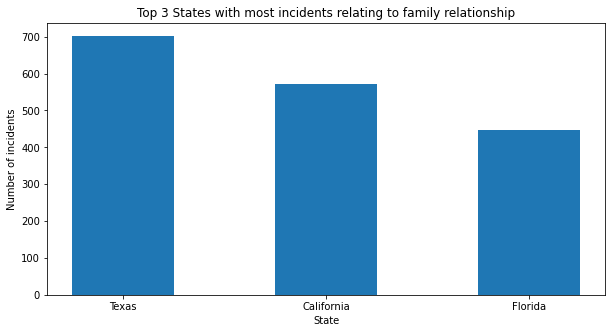

In [1416]:
top_3_state = count_state[:3]

plt.figure(figsize = (10, 5))

plt.title("Top 3 States with most incidents relating to family relationship")
plt.ylabel("Number of incidents")
plt.xlabel("State")
plt.bar(top_3_state['State'], top_3_state['Sum'], width=0.5)
plt.show()

- Từ việc phân tích trên, ta có thể dễ dàng vẽ được biểu đồ về 5 mối quan hệ của  mỗi bang có liên quan đến án mạng nhất.

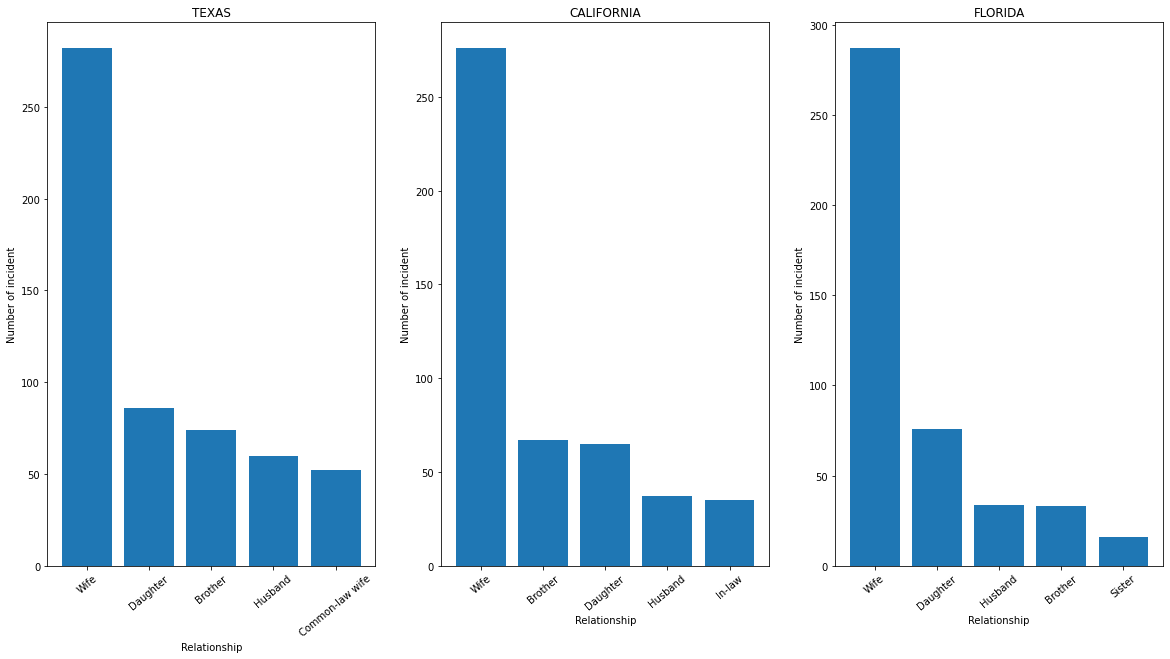

In [1417]:
fig, axs = plt.subplots(1, 3, figsize = (20, 10))

texas_df = top_3_rel_incident[top_3_rel_incident['State'] == 'Texas']
axs[0].set_title('TEXAS')
axs[0].set(xlabel = 'Relationship', ylabel = 'Number of incident')
axs[0].bar(texas_df['Relationship'], texas_df['Count'])
axs[0].set_xticks(texas_df['Relationship'])
axs[0].set_xticklabels(texas_df['Relationship'], rotation = 40);

california_df = top_3_rel_incident[top_3_rel_incident['State'] == 'California']
axs[1].set_title('CALIFORNIA')
axs[1].set(xlabel = 'Relationship', ylabel = 'Number of incident')
axs[1].bar(california_df['Relationship'], california_df['Count'])
axs[1].set_xticks(california_df['Relationship'])
axs[1].set_xticklabels(california_df['Relationship'], rotation = 40);

florida_df = top_3_rel_incident[top_3_rel_incident['State'] == 'Florida']
axs[2].set_title('FLORIDA')
axs[2].set(xlabel = 'Relationship', ylabel = 'Number of incident')
axs[2].bar(florida_df['Relationship'], florida_df['Count'])
axs[2].set_xticks(florida_df['Relationship'])
axs[2].set_xticklabels(florida_df['Relationship'], rotation = 40);


### Trả lời câu hỏi

- Quan sát biểu đồ top 5 mối quan hệ có số vụ án nhiều nhất, ta thấy số vụ án có vợ là nạn nhân cao hơn tương đối nhiều so với các quan hệ còn lại. Do đó các quan chức năng cần quan tâm hơn và chú trọng các quyền bảo vệ phụ nữ nhiều hơn. Bên cạnh đó, họ cần đặc biệt chú ý về vấn đề bạo lực gia đình của chồng đối với vợ, bởi vì đây rất có thể sẽ là mầm mống dẫn tới các vụ án mạng có liên quan. Sâu xa hơn, hệ thống giáo dục cần đề cao việc giáo dục trong gia đình để không xảy ra những sự việc đáng tiếc. Một gia đình hạnh phúc mới có thể tạo nên một xã hội tốt đẹp.

---

## **Câu hỏi số 4**

- (Nhập câu hỏi)
- (Lợi ích của việc tìm câu trả lời cho câu hỏi này)

### Tiền xử lý

### Phân tích

### Trực quan hóa

### Trả lời câu hỏi

- (Nhập câu trả lời và giải thích)

---

# **Đôi điều về đồ án**

- Mỗi thành viên gặp khó khăn gì?
- Mỗi thành viên học được những gì?
- Nếu có thêm thời gian, sẽ làm những gì?

---

# **Các nguồn tham khảo**

https://www.kaggle.com/code/nevil7/homicide-data-identifying-the-serial-killers